
**In this notebook I have written about one of the way to perform params tuning using Pipeline and GridSearchCV , using pipelines you can test different model accuracy with a clean and maintainable code.**

In [2]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import matplotlib.gridspec as gridspec
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
# Import StandardScaler from scikit-learn
from sklearn.preprocessing import PowerTransformer, StandardScaler,Normalizer,RobustScaler,MaxAbsScaler,MinMaxScaler,QuantileTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
# Import train_test_split()
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from datetime import datetime, date
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.model_selection import cross_val_score
import lightgbm as lgbm
from catboost import CatBoostRegressor
import  tensorflow as tf 
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
#import smogn
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
# For training random forest model
import lightgbm as lgb
from scipy import sparse
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,f_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import PolynomialFeatures
from itertools import combinations
#import smong 
from sklearn.linear_model import LinearRegression, RidgeCV
import category_encoders as ce
import warnings
import optuna 
warnings.filterwarnings('ignore')

In [3]:
list2=[0.71973,
       0.71831,
       0.71838,
       0.71824,
       0.71888,
       0.71829,
       0.71909,
       0.71831,
       0.71820,
      0.71812,
      0.71825,
      0.71815,
      0.71891,
      0.71859,
      0.71801,
      0.71828,
      0.71816,
      0.71810,
      0.71829]
list3=['4-featureengineer-featuresselectionpart4(version 15/20)',
      '4-featureengineer-featuresselectionpart4(version 13/20)',
      '4-featureengineer-featuresselectionpart4(version 11/20)',
      '4-featureengineer-featuresselectionpart4(version 10/20)',
      '4-featureengineer-featuresselectionpart4(version 9/20)',
      '4-featureengineer-featuresselectionpart4(version 8/20)',
      '4-featureengineer-featuresselectionpart4(version 8/20)',
      '4-featureengineer-featuresselectionpart4(version 4/20)',
      '3-featureengineer-featuresselectionpart3(version 18/18)',
      '3-featureengineer-featuresselectionpart3(version 17/18)',
      '3-featureengineer-featuresselectionpart3(version 16/18)',
      '3-featureengineer-featuresselectionpart3(version 15/18)',
      '3-featureengineer-featuresselectionpart3(version 7/18)',
      '3-featureengineer-featuresselectionpart3(version 6/18)',
      '3-featureengineer-featuresselectionpart3(version 5/18)',
      '3-featureengineer-featuresselectionpart3(version 4/18)',
      '3-featureengineer-featuresselectionpart3(version 3/18)',
       '3-featureengineer-featuresselectionpart3(version 2/18)',
       'FeaturesEngineer/SelectionPart1(version 6/8)'
      ]
listfinal =   zip(list3, list2)
dicfinal = dict(listfinal)
s = sorted(dicfinal.items(), key=lambda x: x[1], reverse=False)
for k, v in s:
    print(k, v)

3-featureengineer-featuresselectionpart3(version 5/18) 0.71801
3-featureengineer-featuresselectionpart3(version 2/18) 0.7181
3-featureengineer-featuresselectionpart3(version 17/18) 0.71812
3-featureengineer-featuresselectionpart3(version 15/18) 0.71815
3-featureengineer-featuresselectionpart3(version 3/18) 0.71816
3-featureengineer-featuresselectionpart3(version 18/18) 0.7182
4-featureengineer-featuresselectionpart4(version 10/20) 0.71824
3-featureengineer-featuresselectionpart3(version 16/18) 0.71825
3-featureengineer-featuresselectionpart3(version 4/18) 0.71828
FeaturesEngineer/SelectionPart1(version 6/8) 0.71829
4-featureengineer-featuresselectionpart4(version 13/20) 0.71831
4-featureengineer-featuresselectionpart4(version 4/20) 0.71831
4-featureengineer-featuresselectionpart4(version 11/20) 0.71838
3-featureengineer-featuresselectionpart3(version 6/18) 0.71859
4-featureengineer-featuresselectionpart4(version 9/20) 0.71888
3-featureengineer-featuresselectionpart3(version 7/18) 0.718

    3-featureengineer-featuresselectionpart3(version 5/18) 0.71801
    3-featureengineer-featuresselectionpart3(version 2/18) 0.7181
    3-featureengineer-featuresselectionpart3(version 17/18) 0.71812
    3-featureengineer-featuresselectionpart3(version 15/18) 0.71815
    3-featureengineer-featuresselectionpart3(version 3/18) 0.71816
    3-featureengineer-featuresselectionpart3(version 18/18) 0.7182
    4-featureengineer-featuresselectionpart4(version 10/20) 0.71824
    3-featureengineer-featuresselectionpart3(version 16/18) 0.71825
    3-featureengineer-featuresselectionpart3(version 4/18) 0.71828
    FeaturesEngineer/SelectionPart1(version 6/8) 0.71829
    
    4-featureengineer-featuresselectionpart4(version 13/20) 0.71831
    4-featureengineer-featuresselectionpart4(version 4/20) 0.71831
    4-featureengineer-featuresselectionpart4(version 11/20) 0.71838
    3-featureengineer-featuresselectionpart3(version 6/18) 0.71859
    4-featureengineer-featuresselectionpart4(version 9/20) 0.71888
    3-featureengineer-featuresselectionpart3(version 7/18) 0.71891
    4-featureengineer-featuresselectionpart4(version 8/20) 0.71909
    4-featureengineer-featuresselectionpart4(version 15/20) 0.71973

Best pipe from last notebook : 




## Step 2: Load the data

Next, we'll load the training and test data.

We set index_col=0 in the code cell below to use the id column to index the DataFrame. (If you're not sure how this works, try temporarily removing index_col=0 and see how it changes the result.)


In [4]:
# import lux
# Load the training data
train = pd.read_csv("../input/30-days-of-ml/train.csv")
test = pd.read_csv("../input/30-days-of-ml/test.csv")
# Preview the data
train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,B,B,B,C,B,B,A,E,C,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,2,B,B,A,A,B,D,A,F,A,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,3,A,A,A,C,B,D,A,D,A,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
3,4,B,B,A,C,B,D,A,E,C,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
4,6,A,A,A,C,B,D,A,E,A,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


### Num/Cat Features 

In [5]:
cat_columns = train.drop(['id','target'], axis=1).select_dtypes(exclude=['int64','float64']).columns
num_columns = train.drop(['id','target'], axis=1).select_dtypes(include=['int64','float64']).columns

In [6]:
train[train.select_dtypes(['float64']).columns] = train[train.select_dtypes(['float64']).columns].apply(pd.to_numeric)
train[train.select_dtypes(['object']).columns] = train.select_dtypes(['object']).apply(lambda x: x.astype('category'))

## Define the model features and target
### Extract X and y 

In [7]:
# Create arrays for the features and the response variable
y = train['target']
X = train.drop(['id','target'], axis=1)

## Create test and train groups

Now we’ve got our dataframe ready we can split it up into the train and test datasets for our model to use. We’ll use the Scikit-Learn train_test_split() function for this. By passing in the X dataframe of raw features, the y series containing the target, and the size of the test group (i.e. 0.1 for 10%), we get back the X_train, X_test, y_train and y_test data to use in the model.

In [8]:
# Split the dataset and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

60000 rows in test set vs. 240000 in training set. 24 Features.


##  What should we do for each colmun
### Separate features by dtype

Next we’ll separate the features in the dataframe by their datatype. There are a few different ways to achieve this. I’ve used the select_dtypes() function to obtain specific data types by passing in np.number to obtain the numeric data and exclude=['np.number'] to return the categorical data. Appending .columns to the end returns an Index list containing the column names. For the categorical features, we don’t want to include the target income column, so I’ve dropped that.
### Cat Features 

In [9]:
# select non-numeric columns
cat_columns = train.drop(['id','target'], axis=1).select_dtypes(exclude=['int64','float64']).columns

### Num Features 

In [10]:
# select the float columns
num_columns = train.drop(['id','target'], axis=1).select_dtypes(include=['int64','float64']).columns

In [11]:
num_columns=['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13']
cat_columns=['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9']
all_columns = (num_columns+cat_columns)
print(cat_columns)
print(num_columns)
print(all_columns)

['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13']
['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']


## check that we have all column

In [12]:
if set(all_columns) == set(train.drop(['id','target'], axis=1).columns):
    print('Ok')
else:
    # Let's see the difference 
    print('dans all_columns mais pas dans train  :', set(all_columns) - set(train.drop(['id','target'], axis=1).columns))
    print('dans X.columns   mais pas dans all_columns :', set(train.drop(['id','target'], axis=1).columns) - set(all_columns))

Ok


#### Quantile Outlier Handling   

In [13]:
class OutlierReplace(BaseEstimator,TransformerMixin):
    def __init__(self,factor=1.5):
        self.factor = factor

    def outlier_removal(self,X,y=None):
        X = pd.Series(X).copy()
        qmin=X.quantile(0.05)
        qmax=X.quantile(0.95)
        q1 = X.quantile(0.25)
        q3 = X.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (self.factor * iqr)
        upper_bound = q3 + (self.factor * iqr)
        #X.loc[((X < lower_bound) | (X > upper_bound))] = np.nan 
        X.loc[X < lower_bound] = qmin
        X.loc[X > upper_bound] = qmax
        return pd.Series(X)

    def fit(self,X,y=None):
        return self

    def transform(self,X,y=None):
        return X.apply(self.outlier_removal)


## Feature Engineering
Feature engineering is the act of taking raw data and extracting features from it that are suitable for tasks like machine learning. Most machine learning algorithms work with tabular data. When we talk about features, we are referring to the information stored in the columns of these tables
### Sparse Interactions :





In [14]:
class SparseInteractions(BaseEstimator, TransformerMixin):
    def __init__(self, degree=2, feature_name_separator="_"):
        self.degree = degree
        self.feature_name_separator = feature_name_separator
    
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        if not sparse.isspmatrix_csc(X):
            X = sparse.csc_matrix(X)
            
        if hasattr(X, "columns"):
            self.orig_col_names = X.columns
        else:
            self.orig_col_names = np.array([str(i) for i in range(X.shape[1])])
            
        spi = self._create_sparse_interactions(X)
        return spi
    
    
    def get_feature_names(self):
        return self.feature_names
    
    def _create_sparse_interactions(self, X):
        out_mat = []
        self.feature_names = self.orig_col_names.tolist()
        
        for sub_degree in range(2, self.degree + 1):
            for col_ixs in combinations(range(X.shape[1]), sub_degree):
                # add name for new column
                name = self.feature_name_separator.join(self.orig_col_names[list(col_ixs)])
                self.feature_names.append(name)
                
                # get column multiplications value
                out = X[:, col_ixs[0]]    
                for j in col_ixs[1:]:
                    out = out.multiply(X[:, j])

                out_mat.append(out)

        return sparse.hstack([X] + out_mat)

# Data Modeling
Modeling is the part of the Cross-Industry Standard Process for Data Mining (CRISP-DM) process model that i like best. Our data is already in good shape, and now we can search for useful patterns in our data.

## Compelete prerocess pipe for  Cat dara 

In [15]:
Encoder = make_pipeline(
            SimpleImputer(strategy='most_frequent',add_indicator=True),
            #OneHotEncoder(handle_unknown='ignore'),
            #LabelEncoder(),
            OrdinalEncoder() ,
            #SparseInteractions(degree=2)
              )

## Num Features :

In [16]:
Scaler  = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
                        #PolynomialFeatures(degree=2),
                        RobustScaler(),
                        # PowerTransformer(),
                        # StandardScaler(),
                        # MinMaxScaler(),
                        # QuantileTransformer
)

In [17]:
# Different Encoders 
encoders = {
    'BackwardDifferenceEncoder': ce.backward_difference.BackwardDifferenceEncoder,
    'BaseNEncoder': ce.basen.BaseNEncoder,
    'BinaryEncoder': ce.binary.BinaryEncoder,
    'CatBoostEncoder': ce.cat_boost.CatBoostEncoder,
    'HashingEncoder': ce.hashing.HashingEncoder,
    'HelmertEncoder': ce.helmert.HelmertEncoder,
    'JamesSteinEncoder': ce.james_stein.JamesSteinEncoder,
    'OneHotEncoder': ce.one_hot.OneHotEncoder,
    'LeaveOneOutEncoder': ce.leave_one_out.LeaveOneOutEncoder,
    'MEstimateEncoder': ce.m_estimate.MEstimateEncoder,
    'OrdinalEncoder': ce.ordinal.OrdinalEncoder,
    'PolynomialEncoder': ce.polynomial.PolynomialEncoder,
    'SumEncoder': ce.sum_coding.SumEncoder,
    'TargetEncoder': ce.target_encoder.TargetEncoder,
    'WOEEncoder': ce.woe.WOEEncoder
}
# Differents Scaler
Scalers={'StandardScaler': StandardScaler,
    'RobustScaler': RobustScaler,
    #'MinMaxScaler': MinMaxScaler,
    #'PowerTransformer': PowerTransformer,
    #'QuantileTransformer': QuantileTransformer,
    'Normalizer': Normalizer,
    'MaxAbsScaler': MaxAbsScaler}

In [36]:
cross_validation_design = KFold(n_splits=3,
                                shuffle=True,
                                random_state=77)

cross_validation_design

KFold(n_splits=3, random_state=77, shuffle=True)

# Train Catboost / Xgboost / Lgbm
## Define Baseline XGBR 
### hyperparameter



A model hyperparameter is a configuration that is external to the model and whose value cannot be estimated from data.

​ We cannot know the best value for a model hyperparameter on a given problem

​. We may use rules of thumb, copy values used on other problems, or search for the best value by trial and error.

​ We tune the hyperparameters of the model to discover the parameters of the model that result in the most skillful predictions.

​ Examples​ of hyperparameters are:

    The ‘C’ and ‘𝞼’ hyperparameters used in support vector machines​

    The ‘𝞪’ hyperparameter for regularization​

But why are we worried about hyperparameters? It’s because these parameters directly control the behavior of the training algorithm. These have a significant impact on model performance. A good choice of hyperparameters can make your algorithm shine!

 
Hyperparameter Optimizer

Now, let’s see where will a hyperparameter optimizer stands in the whole process of learning the algorithm.
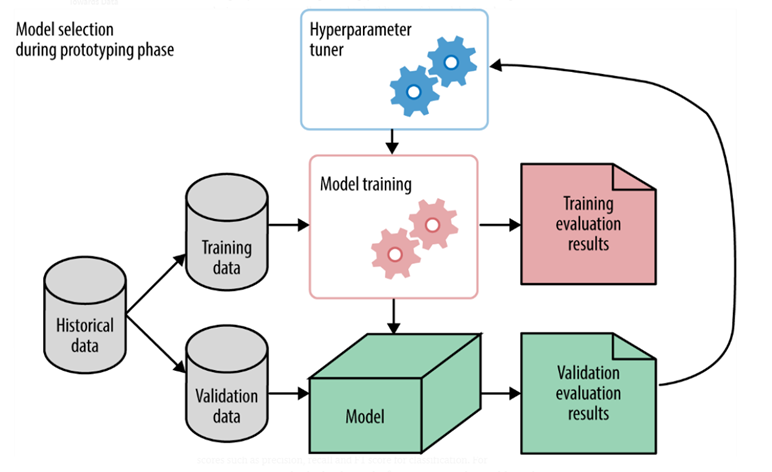

### Tuning Uising Optuna/ GridSearch 

Before you start hypertuning, make sure these things are done:

    Get a baseline. You can get this with smaller models, fewer iterations, default parameters, or a manually tuned model.
    Separate your data into training, validation and test sets.
    Use early stopping rounds with large epochs to prevent overfitting.
    Set up your full model pipeline before training.

Now, I’d like to discuss some terms that I’ll be using in the article:

    Model parameter – A model parameter is that which your model learns from the data, like features, relationships, etc., which you can’t manually tune (not feature engineering).
    Model hyperparameter – Hyperparameters are those values you can tune manually from the model itself, like the learning rate, number of estimators, type of regularization, etc..
    Optimization – A process of adjusting hyperparameters in order to minimize the cost function by using one of the optimization techniques.
    Hyperparameter optimization – Hyperparameter optimization is simply a search to get the best set of hyperparameters that gives the best version of a model on a particular dataset.
    Bayesian optimization – Part of a class of sequential model-based optimization (SMBO) algorithms for using results from a previous experiment to improve the next.
    Hyperparameter sampling – Simply specifying the parameter sampling method to use over the hyperparameter space.
    I’m not against using GridSearchCV. It’s a good option, only that it’s really time-consuming and computationally expensive. If you’re like me, with a busy schedule, you’ll definitely find better options.

A better alternative is RandomSearch CV, which uses random hyperparameter values to pick the best hyperparameters. It’s way faster than GridSearchCV. The downside here is that since it takes random values, we can’t be so sure that those values are the best combination.

But really, when do I know I need to do hyperparameter optimization?

One of the mistakes we often make as data scientists is using the default parameters of a model. You’re probably not using the best version of your model by the default parameters you used. 

Sometimes, when your model is overfitting (performing well on training set and poor on test dataset), or underfitting (performing poorly on training dataset and well on test dataset), optimizing your hyperparameters can really help. A little tweak can make a large difference, from 60% accuracy to 80% accuracy, or even more!

## Optuna

Optuna is designed specially for machine learning. It’s a black-box optimizer, so it needs an objective function. This objective function decides where to sample in upcoming trials, and returns numerical values (the performance of the hyperparameters). It uses different algorithms, such as GridSearch, Random Search, Bayesian and Evolutionary algorithms to find the optimal hyperparameter values.
Some of the features are:

    Efficient sampling and pruning algorithms.
    Easy to install, needs few requirements.
    Easier to use than Hyperopt.
    Uses distributed optimization.
    You can define search spaces using Python syntax, including conditionals and loops.
    You can analyze optimization results visually.
    Easy scalability with little or no changes to the code.

Optuna uses the pruning algorithm. Pruning is a technique used in machine learning and search algorithms to reduce the size of decision trees, by removing sections of the tree that are non-critical and redundant to classify instances.

Pruning in Optuna automatically stops unpromising trials at the early stages of the training, which you can also call automated early-stopping. Optuna provides the following pruning algorithms:

    Asynchronous Successive Halving algorithm.
    Hyperband algorithm.
    Median pruning algorithm which uses the median stopping rule.
    Threshold pruning algorithm, used to detect outlying metrics of the trials.

I’ll highlight the simple steps you need to use Optuna:

    First, install Optuna with `pip install optuna`, if it’s not already installed.
    Define your model.
    Choose parameters to optimize.
    Create a study.
    Define objective function.
    Optimize.
    Check trial results.




In [19]:
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,f_classif
from sklearn.preprocessing import PolynomialFeatures
# Random HyperParameters
xgb_params = {'n_estimators': 7000,
            'learning_rate': 0.16,
            'subsample': 0.96,
            'colsample_bytree': 0.12,
            'max_depth': 2,
            'booster': 'gbtree', 
            'reg_lambda': 100.1,
            'reg_alpha': 15.9,
            'random_state':40}
XGBR = XGBRegressor(**xgb_params,
                    objective='reg:squarederror', 
                    #early_stopping_rounds=100 ,
                    tree_method='gpu_hist',
                    gpu_id=0, 
                    predictor="gpu_predictor"
                   )

In [20]:
cat_columns2=['cat0', 'cat1', 'cat2']
cat_columns1=['cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
num_columns1=[ 'cont1', 'cont2', 'cont3', 'cont4', 'cont5',  'cont7',  'cont9', 'cont10', 'cont11', 'cont12', 'cont13']
num_columns2=['cont0','cont6','cont8']
all_columns1=cat_columns1+cat_columns2+num_columns1+num_columns2
if set(all_columns) == set(train.drop(['id','target'], axis=1).columns):
    print('Ok')
else:
    # Let's see the difference 
    print('dans all_columns mais pas dans train  :', set(all_columns) - set(train.drop(['id','target'], axis=1).columns))
    print('dans X.columns   mais pas dans all_columns :', set(train.drop(['id','target'], axis=1).columns) - set(all_columns))

Ok


In [21]:
# 3-featureengineer-featuresselectionpart3(version 5/18) 0.71801
# Cat Features  
CatBoostEncoder1 = make_pipeline(
            SimpleImputer(strategy='most_frequent',add_indicator=True),
            ce.cat_boost.CatBoostEncoder(),
            #SparseInteractions(degree=2)
              )
# Num Features 
RobustScaler1  = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
                       # PolynomialFeatures(degree=2),
                        RobustScaler()
)
CatBoostEncoder_RobustScaler = make_column_transformer(
    ( CatBoostEncoder1 , cat_columns),
    ( RobustScaler1, num_columns))
    
XGBRCatBoostEncoderRobustScalerwithoutfeatures = Pipeline([
        ('preprocess', CatBoostEncoder_RobustScaler),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR)])  
# validation :0.7196597118650423/ test: / Public: 



#3-featureengineer-featuresselectionpart3(version 2/18) 0.7181
# Cat Features  
OrdinalEncoder1 = make_pipeline(
            SimpleImputer(strategy='most_frequent',add_indicator=True),
            ce.ordinal.OrdinalEncoder(),
            #SparseInteractions(degree=2)
              )
# Num Features 
QuantileTransformer1  = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
                        #PolynomialFeatures(degree=2),
                        QuantileTransformer()
)
OrdinalEncoder_QuantileTransformer = make_column_transformer(
    ( OrdinalEncoder1 , cat_columns),
    ( QuantileTransformer1, num_columns))
    
# Pipe 6:OrdinalEncoderSparse /StandardScalerPolynomial without reduction
# 0.7048661500017998/Public Score : 0.71829
XGBROrdinalEncoderQuantileTransformerwithoutfeatures= Pipeline([
        ('preprocess', OrdinalEncoder_QuantileTransformer),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR)]) 


# 3-featureengineer-featuresselectionpart3(version 17/18) 0.71812
# Cat Features  
OrdinalEncoder1441 = make_pipeline(
            SimpleImputer(strategy='most_frequent',add_indicator=True),
            ce.ordinal.OrdinalEncoder(),
           # SparseInteractions(degree=2)
              )
# Num Features 
RobustScaler1441  = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
                        #PolynomialFeatures(degree=2),
                        RobustScaler()
)
OrdinalEncoder_RobustScaler1441 = make_column_transformer(
    ( OrdinalEncoder1441 , cat_columns),
    ( RobustScaler1441, num_columns))
    

XGBROrdinalEncoderRobustScalerwithoutreduction_features144 = Pipeline([
        ('preprocess', OrdinalEncoder_RobustScaler1441),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR)]) 
# test: 0.7044010096971889 /  Public : 17/17




# 3-featureengineer-featuresselectionpart3(version 15/18) 0.71815
# Cat Features  
CatBoostEncoder34 = make_pipeline(
            SimpleImputer(strategy='most_frequent',add_indicator=True),
            ce.cat_boost.CatBoostEncoder(),
            #SparseInteractions(degree=2)
              )
# Num Features 
MaxAbsScaler34  = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
                        #PolynomialFeatures(degree=2),
                        MaxAbsScaler()
)
CatBoostEncoder_MaxAbsScaler34 = make_column_transformer(
    ( CatBoostEncoder34 , cat_columns),
    ( MaxAbsScaler34, num_columns))
    

XGBRCatBoostEncoderMaxAbsScalerwithoutreduction_features34 = Pipeline([
        ('preprocess', CatBoostEncoder_MaxAbsScaler34),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR)]) 



# 3-featureengineer-featuresselectionpart3(version 3/18) 0.71816
# Cat Features  
OrdinalEncoder1 = make_pipeline(
            SimpleImputer(strategy='most_frequent',add_indicator=True),
            ce.ordinal.OrdinalEncoder(),
            #SparseInteractions(degree=2)
              )
# Num Features 
MaxAbsScaler1  = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
                        #PolynomialFeatures(degree=2),
                        MaxAbsScaler()
)
OrdinalEncoder_MaxAbsScaler = make_column_transformer(
    ( OrdinalEncoder1 , cat_columns),
    ( MaxAbsScaler1, num_columns))
    
# Pipe 6:OrdinalEncoderSparse /StandardScalerPolynomial without reduction
# 0.7048661500017998/Public Score : 0.71829
XGBROrdinalEncoderMaxAbsScalerwithoutfeatures= Pipeline([
        ('preprocess', OrdinalEncoder_MaxAbsScaler),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR)])  




# 3-featureengineer-featuresselectionpart3(version 18/18) 0.7182
# Cat Features  
OrdinalEncoder133= make_pipeline(
            SimpleImputer(strategy='most_frequent',add_indicator=True),
            ce.ordinal.OrdinalEncoder(),
            #SparseInteractions(degree=2)
              )
# Num Features 
PowerTransformer133  = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
                        #PolynomialFeatures(degree=2),
                        PowerTransformer())
OrdinalEncoder_PowerTransformer133 = make_column_transformer(
    ( OrdinalEncoder133 , cat_columns),
    ( PowerTransformer133, num_columns))
    

XGBROrdinalEncoderPowerTransformerwithoutreduction_features133 = Pipeline([
        ('preprocess', OrdinalEncoder_PowerTransformer133),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR)])
# test: 0.7044315280956893 /  Public  :  18/18



# 4-featureengineer-featuresselectionpart4(version 10/20) 0.71824
# Cat Features  
# Ordinal Features : 
ordinalencoder = make_pipeline(
            SimpleImputer(strategy='most_frequent',add_indicator=True),
            ce.ordinal.OrdinalEncoder()
              )
# Bin Feautres  'cat0', 'cat1', 'cat2' 
binaryencoder = make_pipeline(
            SimpleImputer(strategy='most_frequent',add_indicator=True),
            ce.binary.BinaryEncoder()
              )
# Num Features 
robustscaler = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
                        #PolynomialFeatures(degree=2),
                        RobustScaler())

# Num with outlier replacement for 'cont0','cont6','cont8' num_columns2
robustscalerOutlier= make_pipeline( 
                      OutlierReplace(),
                        SimpleImputer(strategy='median',add_indicator=True),
                        #PolynomialFeatures(degree=2),
                        RobustScaler()
                              )
# Preprocess
Preprocess1 = make_column_transformer(
    ( ordinalencoder , cat_columns1),
    ( binaryencoder , cat_columns2),
    ( robustscaler , num_columns1),
    ( robustscalerOutlier , num_columns2))
    
XGBROrdinalEncoderrobustscalerOutlierPreprocessreduction1= Pipeline([
        ('preprocess', Preprocess1),
        # ('dim_red', SelectKBest(mutual_info_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR)])  
  
# val  :/test :0.7035311121579394/Public  :



# 3-featureengineer-featuresselectionpart3(version 16/18) 0.71825
# Cat Features  
CatBoostEncoder33 = make_pipeline(
            SimpleImputer(strategy='most_frequent',add_indicator=True),
            ce.cat_boost.CatBoostEncoder(),
            #SparseInteractions(degree=2)
              )
# Num Features 
QuantileTransformer33  = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
                        #PolynomialFeatures(degree=2),
                        QuantileTransformer()
)
CatBoostEncoder_QuantileTransformer33 = make_column_transformer(
    ( CatBoostEncoder33 , cat_columns),
    ( QuantileTransformer33, num_columns))
    

XGBRCatBoostEncoderQuantileTransformerwithout_features_reduction33 = Pipeline([
        ('preprocess', CatBoostEncoder_QuantileTransformer33),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR)])  
# test :0.7070272032074714/Public :

# 3-featureengineer-featuresselectionpart3(version 4/18) 0.71828
# Num Features 
PowerTransformer2  = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
                        #PolynomialFeatures(degree=2),
                        PowerTransformer()
)
CatBoostEncoder_PowerTransformer = make_column_transformer(
    ( CatBoostEncoder1 , cat_columns),
    ( PowerTransformer2, num_columns))
    
XGBRCatBoostEncoderPowerTransformerwithoutfeatures  = Pipeline([
        ('preprocess', CatBoostEncoder_PowerTransformer),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR)])



#FeaturesEngineer/SelectionPart1(version 6/8) 0.71829
fill_missing_then_one_hot_encoder = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='manquante',add_indicator=True),
    OneHotEncoder(handle_unknown='ignore')
)
# Polynominal features + 
fill_missing_then_StandardScalerPolynomialFeatures = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
     PolynomialFeatures(degree=2),StandardScaler()
)
data_preprocessoneOnehotPolynomialFeatures = make_column_transformer(
    ( fill_missing_then_one_hot_encoder , cat_columns),
    ( fill_missing_then_StandardScalerPolynomialFeatures, num_columns)
)

# Best Pipe to to tune 

In [22]:
# 4-featureengineer-featuresselectionpart4(version 10/20) 0.71824
# Cat Features  
# Ordinal Features : 
ordinalencoder = make_pipeline(
            SimpleImputer(strategy='most_frequent',add_indicator=True),
            ce.ordinal.OrdinalEncoder()
              )
# Bin Feautres  'cat0', 'cat1', 'cat2' 
binaryencoder = make_pipeline(
            SimpleImputer(strategy='most_frequent',add_indicator=True),
            ce.binary.BinaryEncoder()
              )
# Num Features 
quantiletransformer = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
                        #PolynomialFeatures(degree=2),
                        QuantileTransformer())

# Num with outlier replacement for 'cont0','cont6','cont8' num_columns2
quantiletransformerOutlier= make_pipeline( 
                      OutlierReplace(),
                        SimpleImputer(strategy='median',add_indicator=True),
                        #PolynomialFeatures(degree=2),
                        QuantileTransformer()
                              )
# Preprocess
preprocessordinalbinaryquantiletransformer = make_column_transformer(
    ( ordinalencoder , cat_columns1),
    ( binaryencoder , cat_columns2),
    ( quantiletransformer , num_columns))
    
XGBRpreprocessordinalquantiletransformerbaseline= Pipeline([
        ('preprocess', preprocessordinalbinaryquantiletransformer),
        # ('dim_red', SelectKBest(mutual_info_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR)])  

Trial 665 finished with value: 0.719263703817949 and parameters: 

        {'n_estimators': 5500, 'max_depth': 7, 'learning_rate': 0.04228058062291333, 'gamma': 0.7000000000000001, 'min_child_weight': 7, 'subsample': 0.8, 'colsample_bytree': 0.1, 'reg_alpha': 11.70236964019307, 'reg_lambda': 0.030505390929992562}.

Best is trial 665 with value: 0.719263703817949.
{'max_depth': 2, 'learning_rate': 0.07123779922425576, 'gamma': 0.30000000000000004, 'min_child_weight': 3, 'subsample': 0.9, 'colsample_bytree': 0.9, 'reg_alpha': 0.0013832469277755268, 'reg_lambda': 0.035255154051375526}

In [23]:
# Cat Features  
# Ordinal Features : 
ordinalencoder = make_pipeline(
            SimpleImputer(strategy='most_frequent',add_indicator=True),
            ce.ordinal.OrdinalEncoder()
              )
# Bin Feautres  'cat0', 'cat1', 'cat2' 
binaryencoder = make_pipeline(
            SimpleImputer(strategy='most_frequent',add_indicator=True),
            ce.binary.BinaryEncoder()
              )
# Num Features 
RobustScaler144  = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
                        #PolynomialFeatures(degree=2),
                        RobustScaler()
)
OrdinalEncoder_RobustScaler144 = make_column_transformer(
    ( ordinalencoder , cat_columns1),
    ( binaryencoder , cat_columns2),
    ( RobustScaler144 , num_columns))
    

XGBROrdinalEncoderRobustScalerwithoutreduction_features144 = Pipeline([
        ('preprocess', OrdinalEncoder_RobustScaler144),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR)]) 
# test: 0.7044010096971889 /  Public : 17/17

{'max_depth': 2, 'learning_rate': 0.07123779922425576, 'gamma': 0.30000000000000004, 'min_child_weight': 3, 'subsample': 0.9, 'colsample_bytree': 0.9, 'reg_alpha': 0.0013832469277755268, 'reg_lambda': 0.035255154051375526}

In [24]:
from sklearn import set_config
set_config(display='diagram')
XGBROrdinalEncoderRobustScalerwithoutreduction_features144

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['cat3', 'cat4', 'cat5',
                                                   'cat6', 'cat7', 'cat8',
                                                   'cat9']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='m...
                              interaction_constraints=None, learning_rate=0.16,
                              max_delta_step=None, max_depth=2,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=7000,
                              n_jobs=None, num_parallel_tree=None,
                              predictor='gpu_predictor', random_state=40,
                              reg_alpha=15.9, reg_lambda=100.1,
                              scale_pos_weight=None, subsample=0.96,
                              tree_method='gpu_hist', validate_parameters=None,
                              verbosity=None))])

In [25]:
#rmse =cross_val_score(XGBROrdinalEncoderRobustScalerwithoutreduction_features144, X, y, cv=cross_validation_design,scoring='neg_root_mean_squared_error').mean()
#print(-rmse)

# Tuning with Optuna :  

In [26]:
OrdinalEncoder_RobustScaler144.fit(X_train,y_train)
X_trainprep=OrdinalEncoder_RobustScaler144.transform(X_train)
X_testprep =OrdinalEncoder_RobustScaler144.transform(X_test)

In [27]:
X_trainprep[0]

array([ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        1.00000000e+00,  0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        1.00000000e+00, -3.60544707e-01,  9.54924206e-01,  1.18501629e+00,
       -1.97665444e-01, -2.73658284e-01, -2.86646247e-01,  2.50931041e-01,
        1.04847095e+00, -7.94548984e-04, -2.66284170e-01, -5.57036593e-01,
       -2.09740259e-01, -2.14231759e-01,  4.90109041e-03])

In [30]:
def objective(trial):
    
    #n_estimators = trial.suggest_int("n_estimators", 7000, 10000,1000)
    max_depth = trial.suggest_int("max_depth", 1, 10)
    learning_rate = trial.suggest_float("learning_rate", 1e-6, 0.25, log=True)
    #gamma = trial.suggest_float("gamma", 0.1, 1.0, step=0.1)
    #min_child_weight = trial.suggest_int("min_child_weight", 2, 5, step=1)
    subsample = trial.suggest_float("subsample", 0.1, 1.0, step=0.1)
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.1, 1.0, step=0.1)
    reg_alpha = trial.suggest_loguniform("reg_alpha", 1e-8, 100.0)
    reg_lambda = trial.suggest_loguniform("reg_lambda", 1e-8, 100.0)
    
    
    model = XGBRegressor(
        #n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        #gamma=gamma,
        #min_child_weight=min_child_weight,
        colsample_bytree=colsample_bytree,
        subsample=subsample,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        n_estimators=7000,
        objective='reg:squarederror', 
        n_jobs=-1, 
        tree_method='gpu_hist',
        predictor="gpu_predictor",
        gpu_id=0,
        random_state=48
    )   
    
    model.fit(X_trainprep, y_train,
        #eval_set = [ (X_testprep, y_test)],
        #eval_metric = "rmse",
        #early_stopping_rounds = 100,
              verbose=0)
    
    
    y_hat = model.predict(X_testprep)
    
    return mean_squared_error(y_test, y_hat, squared=False)

In [35]:
#study = optuna.create_study(direction='minimize') 
#study.optimize(objective, n_trials=300)

In [32]:
study.best_params

{'max_depth': 3,
 'learning_rate': 0.034923843361431936,
 'subsample': 0.7000000000000001,
 'colsample_bytree': 0.1,
 'reg_alpha': 0.5333109437994918,
 'reg_lambda': 97.48121524546883}

{'max_depth': 3,
 'learning_rate': 0.034923843361431936,
 'subsample': 0.7000000000000001,
 'colsample_bytree': 0.1,
 'reg_alpha': 0.5333109437994918,
 'reg_lambda': 97.48121524546883}

In [33]:
#print('Number of finished trials:', len(study.trials))
#print('Best trial:', study.best_trial.params)

Number of finished trials: 300
Best trial: {'max_depth': 3, 'learning_rate': 0.034923843361431936, 'subsample': 0.7000000000000001, 'colsample_bytree': 0.1, 'reg_alpha': 0.5333109437994918, 'reg_lambda': 97.48121524546883}


In [34]:


# Visualize parameter importances.
#optuna.visualization.plot_param_importances(study)



# Tuning with GridSearch

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
XGBR1 = XGBRegressor(#n_estimators=7000,
        objective='reg:squarederror', 
        n_jobs=-1, 
        tree_method='gpu_hist',
        predictor="gpu_predictor",
        gpu_id=0,
        random_state=40
    )
      
XGBR_MODEL = {}
# Définir la pipeline
XGBR_MODEL['pipeline'] = Pipeline([
                                  ('data_process', OrdinalEncoder_RobustScaler144),
                                  ('XGBR', XGBR1)
                                  ])

# Définir la grille
XGBR_MODEL['hyperparams'] = {}
XGBR_MODEL['hyperparams']['XGBR__n_estimators'] = [5000,7000,8000]
XGBR_MODEL['hyperparams']['XGBR__colsample_bytree'] = [0.06 ,0.1,0.12]
XGBR_MODEL['hyperparams']['XGBR__max_depth'] = [ 2,3,5,7]
XGBR_MODEL['hyperparams']['XGBR__reg_alpha'] = [0.5333,15.9,23.13,10.924491968127692]
XGBR_MODEL['hyperparams']['XGBR__reg_lambda'] = [ 0.03,5.7,97.48121524546883,17.396730654687218]
XGBR_MODEL['hyperparams']['XGBR__subsample'] = [0.7,0.8,0.96]
XGBR_MODEL['hyperparams']['XGBR__gamma'] = [0.15,0.5,1,0.7,0.8]
XGBR_MODEL['hyperparams']['XGBR__learning_rate'] = [0.16,0.02, 0.034923843361431936,0.05,0.09985133666265425]
XGBR_MODEL['hyperparams']['XGBR__min_child_weight'] = [3,6,7,8]
XGBR_MODEL['hyperparams']['XGBR__booster'] = ['gbtree']

XGBR_MODEL['gridsearch'] = GridSearchCV(
    estimator=XGBR_MODEL['pipeline'],
    param_grid=XGBR_MODEL['hyperparams'],
    cv=cross_validation_design,
    scoring='neg_root_mean_squared_error'
    
    )
#Define SVR classifier
#XGBR_MODEL['gridsearch'].fit(X_train, y_train)

In [ ]:
XGBR_accuracy = XGBR_MODEL['gridsearch'].score(X_test, y_test)
print('SXGBR Accuracy : ', XGBR_accuracy)

In [ ]:
XGBR_MODEL['gridsearch'].best_score_

In [ ]:
XGBR_MODEL['gridsearch'].best_params_

Optuna :

    {'max_depth': 3,
     'learning_rate': 0.034923843361431936,
     'subsample': 0.7000000000000001,
     'colsample_bytree': 0.1,
     'reg_alpha': 0.5333109437994918,
     'reg_lambda': 97.48121524546883}

randomSearch SXGBR Accuracy :  -0.7199575691697486

        {'XGBR__subsample': 0.7,
     'XGBR__reg_lambda': 97.48121524546883,
     'XGBR__reg_alpha': 23.13,
     'XGBR__n_estimators': 7000,
     'XGBR__min_child_weight': 6,
     'XGBR__max_depth': 7,
     'XGBR__learning_rate': 0.16,
     'XGBR__gamma': 0.8,
     'XGBR__colsample_bytree': 0.06,
     'XGBR__booster': 'gbtree'}
    GridSearch 

# Fine Tune LGBM : 

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
modelLGBMRegressor = LGBMRegressor(metric = 'rmse', 
                                   objective= "rmse",
                                   boosting_type= 'gbdt',
                                   device_type='gpu',
                                   n_jobs = -1,
                                   min_child_samples =  27,
                                   max_bin = 523,
                                   cat_l2 = 0.025083670064082797) 
LGBM_MODEL = {}
# Définir la pipeline
LGBM_MODEL['pipeline'] = Pipeline([
                                  ('data_process', OrdinalEncoder_RobustScaler144),
                                  ('LGBM', modelLGBMRegressor)
                                  ])

# Définir la grille
LGBM_MODEL['hyperparams'] = {}
LGBM_MODEL['hyperparams']['LGBM__n_estimators'] = [50000,7000,8428]
LGBM_MODEL['hyperparams']['LGBM__colsample_bytree'] = [0.21497646795452627 ,0.1,0.8645965377799666]
LGBM_MODEL['hyperparams']['LGBM__max_depth'] = [ 18,2,20]
LGBM_MODEL['hyperparams']['LGBM__reg_alpha'] = [10.924491968127692,0.045791986756797375,23.13]
LGBM_MODEL['hyperparams']['LGBM__reg_lambda'] = [ 0.03,0.002070681206144435,97.48121524546883]
LGBM_MODEL['hyperparams']['LGBM__subsample'] = [0.7582562557431147,0.8,0.8943640005229004]
LGBM_MODEL['hyperparams']['LGBM__gamma'] = [0.15,0.5,1,0.7,0.8]
LGBM_MODEL['hyperparams']['LGBM__learning_rate'] = [0.009985133666265425,0.04052031827001172, 0.034923843361431936,0.05,0.005]
LGBM_MODEL['hyperparams']['LGBM__min_child_weight'] = [3,6,7,8]

LGBM_MODEL['gridsearch'] = RandomizedSearchCV(
    estimator=LGBM_MODEL['pipeline'],
    param_grid=LGBM_MODEL['hyperparams'],
    cv=cross_validation_design,
    scoring='neg_root_mean_squared_error'
    
    )
#Define SVR classifier
#LGBM_MODEL['gridsearch'].fit(X_train, y_train)

# Select Best Pipe and retrain on all data 

In [ ]:
data_cleaning = make_column_transformer(
    ( OneHotEncoder(), colonnes_catégoriques ),
    ( fill_missing_then_one_hot_encoder , colonnes_catégoriques_avec_valeurs_manquantes),
    ( SimpleImputer(strategy='mean'), colonnes_numériques_avec_valeurs_manquantes),
    ( CountVectorizer(), 'Name'),
    ( extraire_lettre_cabine, 'Cabin'),
    ( 'drop' , drop_colonnes),
    ( 'passthrough' , passthrough_colonnes)
)

model_final = Pipeline([('data_cleaning', data_cleaning),
                        ('rf', RandomForest(random_state=7,
                                            max_depth=10,
                                            max_features=0.25,
                                            n_estimators=150))
                        ])


# on fit la meilleur pipe sur toute nos données de train
model_final.fit(X, Y)
#XGBRtargetEncoderrobustScalerOutlierPreprocessfeatures1.fit(X,y)

#  Submit to the competition
We'll begin by using the trained model to generate predictions, which we'll save to a CSV file.


In [ ]:
#preds_valid = XGBRtargetEncoderrobustScalerOutlierPreprocessfeatures1.predict(X_test)
#print(mean_squared_error(y_test, preds_valid, squared=False))
#test_final= test.drop(['id'], axis=1)
# Use the model to generate predictions
#predictions = XGBRtargetEncoderrobustScalerOutlierPreprocessfeatures1.predict(test_final)
# Save the predictions to a CSV file
#output = pd.DataFrame({'Id': test.id,'target': predictions})
#output.to_csv('XGBRtargetEncoderrobustScalerOutlierPreprocessfeatures1.csv', index=False)

In [ ]:

N_FOLD = 7

#Setting the kfold parameters
kf = KFold(n_splits=N_FOLD, shuffle=True, random_state = 50)

oof_preds = np.zeros((X.shape[0],))
predictions = 0
model_fi = 0
mean_rmse = 0

for num, (train_idx, valid_idx) in enumerate(kf.split(X)):
    # split the train data into train and validation
    X_train = X.iloc[train_idx][ALL]
    X_valid = X.iloc[valid_idx][ALL]
    y_train = y.iloc[train_idx]
    y_valid = y.iloc[valid_idx]
    # Define the model 
    model = LGBMRegressor(metric = 'rmse', 
    n_jobs = -1,
    n_estimators = 50000,
    reg_alpha = 10.924491968127692,
    reg_lambda = 17.396730654687218,
    colsample_bytree = 0.21497646795452627,
    subsample = 0.7582562557431147,
    learning_rate = 0.009985133666265425,
    max_depth = 18,
    num_leaves =  63,
    min_child_samples =  27,
    max_bin = 523,
    cat_l2 = 0.025083670064082797)
    
    # Train the model
    model.fit(X_train, y_train, eval_set = ((X_valid,y_valid)),verbose = -1, 
          early_stopping_rounds = 100)
    
    #Mean of the predictions
    predictions += model.predict(X_test) / N_FOLD
    
    #Mean of feature importance
    model_fi += model.feature_importances_ / N_FOLD 
    
    #Out of Fold predictions
    oof_preds[valid_idx] = model.predict(X_valid)
    fold_rmse = np.sqrt(mean_squared_error(y_valid, oof_preds[valid_idx]))
    #print(f"Fold {num} | RMSE: {fold_rmse}")
    
    mean_rmse += fold_rmse / N_FOLD
    
print(f"\nOverall RMSE: {mean_rmse}")

# Use the model to generate predictions
predictions = model.predict(X_test)

# Save the predictions to a CSV file
output = pd.DataFrame({'Id': X_test.index,
                       'target': predictions})
output.to_csv('submission.csv', index=False)

# FQEATURES TI ELIMNATE / 
X_test.pop("cat2")
X_test.pop("cat6")
X_test.pop("cat4")
X_test.pop("cat3")

 : 
# Pipe and code to follow :

### Xgboost :  

https://www.kaggle.com/tilii7/bias-correction-xgboost :done

https://www.kaggle.com/saharshlaud/30-days-of-ml-competition-lgbm-kfold: done 

https://www.kaggle.com/benamar/cactus-30-days-of-ml :done 

https://www.kaggle.com/sabinaabdurakhmanova/weighed-average-ensemble :done

https://www.kaggle.com/elegent/kfold-xgboost-edited-with-optuna-tuning: done

https://www.kaggle.com/buddikaweerasinghe/day-4-30daysofml: done

https://www.kaggle.com/ranjeetshrivastav/optuna-voting-xgb-lgb :done 

https://www.kaggle.com/abhishek/competition-part-4-optimized-xgboost :done 

https://www.kaggle.com/farelarden/30-days-optimized-xgb :done 

https://www.kaggle.com/gsslim/30day-of-ml-xgb-simplified :done

https://www.kaggle.com/shreyashgupta88/30-days-of-ml-top-7 :done 

https://www.kaggle.com/gsslim/30day-of-ml-xgb-with-eda :done 

https://www.kaggle.com/adityastark07/tuning-params :done 

https://www.kaggle.com/haotianhang/30-days-of-ml-xgboost-optuna-best-score-0-71949 : done 

https://www.kaggle.com/houriabraikia/getting-started-with-30-days-of-ml-competition

https://www.kaggle.com/mdmub0587/models-building-of-30-days-ml-challenge

https://www.kaggle.com/mohammadghanaym/eda-xgboost-hyperparameters-tuning

https://www.kaggle.com/maximkazantsev/30dml-eda-xgboost

https://www.kaggle.com/andersvp/xgboost-kfold-and-hyperopt-tuning

https://www.kaggle.com/mhmdsyed/30-day-ml-starter-eda-simple-xgboost-model

https://www.kaggle.com/miguelquiceno/30-days-xgboost-optuna

https://www.kaggle.com/pranav2109/xgbpipeline

https://www.kaggle.com/afifnugraha/kaggle-30-days-ml-competition-by-afif

https://www.kaggle.com/kavehshahhosseini/30-days-ml-xgboost-hyperparameter-optimization

https://www.kaggle.com/kavehshahhosseini/30-days-ml-xgboost-hyperparameter-optimization

https://www.kaggle.com/mrkyawswarthant/simple-xgboost-with-gpu

https://www.kaggle.com/miguelquiceno/30-days-kfold-xgboost

https://www.kaggle.com/linzino/use-easily-with-xgboost-from-getting-started
https://www.kaggle.com/yogidsba/30days-of-ml-xgboost

https://www.kaggle.com/boneacrabonjac/30-days-ml-xgbr-with-auto-eda

https://www.kaggle.com/rishirajacharya/30-days-xgboost-with-5-folds-eda-gpu

https://www.kaggle.com/mohammadghanaym/30-ml-competition-xgboost

https://www.kaggle.com/lucamassaron/tutorial-bayesian-optimization-with-xgboost

https://www.kaggle.com/lucamassaron/tutorial-bayesian-optimization-with-catboost

https://www.kaggle.com/lucamassaron/tutorial-bayesian-optimization-with-lightgbm

https://www.kaggle.com/medicinewave/1stday-easy-lgbm-tuned

https://www.kaggle.com/pranav2109/featureengineering-ensemble-xgbpipeline

https://www.kaggle.com/heyrobin/30-days-ml-with-xgbr

https://www.kaggle.com/mohammadghanaym/eda-xgboost-hyperparameters-tuning

https://www.kaggle.com/hamzaghanmi/30-days-of-ml-competition-step-by-step

https://www.kaggle.com/adityastark07/tuning-params

https://www.kaggle.com/deepikakilari/30daysofml-xgboost-hyperparameters-tuning

https://www.kaggle.com/benamar/cactus-30-days-of-ml

https://www.kaggle.com/sergeyzemskov/xgboost-tuned-hyperparams-eda

https://www.kaggle.com/raushan9jnv/30daysml

https://www.kaggle.com/hsuchialun/xgboost-kfold-with-gpu

https://www.kaggle.com/pranav2109/featureengineering-ensemble-xgbpipeline

https://www.kaggle.com/sgedela/30-days-of-ml-competitionhttps:

https://www.kaggle.com/sgedela/30-days-of-ml-competition

www.kaggle.com/sgedela/30-days-of-ml-competition

https://www.kaggle.com/adam48/tutorial-building-a-custom-pipeline-for-hyperopt?scriptVersionId=72864232
https://www.kaggle.com/kausheeki01/30-days-of-ml-competition-7-1-blending

### LGBM
https://www.kaggle.com/saileshnair/lgbm-optuna-hyperparameter-tuning

https://www.kaggle.com/ranjeetshrivastav/optuna-voting-xgb-lgb

https://www.kaggle.com/yaeulrichgaba/trying-lgbm-simple-30-days-ml-competition

https://www.kaggle.com/seraphwedd18/lightgbm-with-feature-engineering

https://www.kaggle.com/jahaziel/lgb-optuna
https://www.kaggle.com/mohammadghanaym/30-ml-eda-xgboost-kfold

https://www.kaggle.com/michaelisaac15/repeat-lgbm-with-fe

https://www.kaggle.com/kokitanisaka/lightgbm-starter-30-days-of-ml

https://www.kaggle.com/lucamassaron/tutorial-bayesian-optimization-with-xgboost

https://www.kaggle.com/saharshlaud/30-days-of-ml-competition-lgbm-kfold

https://www.kaggle.com/nitinrajput47/only-notebook-you-need-to-read

https://www.kaggle.com/stevenrferrer/30-days-of-ml-optimized-xgboost-5folds


# cat boost :
https://www.kaggle.com/maximkazantsev/30dml-eda-simple-catboost

https://www.kaggle.com/aymanlafaz/30dml-catboost-optuna-optim

# Features Engineer :
https://www.kaggle.com/abhishek/competition-part-2-feature-engineering

https://www.kaggle.com/hongpeiyi/tuning-xgboost-with-optuna

https://www.kaggle.com/ranjeetshrivastav/optuna-voting-xgb-lgb

# Deep Learning : 
https://www.kaggle.com/lucamassaron/tutorial-tensorflow-2-x-for-tabular-data

https://www.kaggle.com/hugovallejo/30-days-neural-network

https://www.kaggle.com/yassinemesbahi/eda-fe-artificial-neural-network-model

https://www.kaggle.com/sgedela/30-days-of-ml-competition

https://www.kaggle.com/tsubajiro/prediction-with-neural-network

https://www.kaggle.com/mtinti/keras-starter-with-bagging-1111-84364

# AutoML
# Ensemble : 

https://www.kaggle.com/sabinaabdurakhmanova/weighed-average-ensemble

https://www.kaggle.com/abhishek/blending-blending-blending

https://www.kaggle.com/hamzaghanmi/stacking-regression-step-by-step

https://www.kaggle.com/abhishek/competition-part-6-stacking

https://www.kaggle.com/shilpabadge/note-stacking

https://www.kaggle.com/kennethquisado/blending-stacking-xgboost-lgbm-catboost

https://www.kaggle.com/jhsoft/competition-day-6-stacking10

https://www.kaggle.com/noulan/standing-on-the-shoulders-of-giants-ensemble

https://www.kaggle.com/jhsoft/competition-day-6-stacking10

https://www.kaggle.com/deepvora9832/stacking-notebook

https://www.kaggle.com/kokitanisaka/a-way-of-finding-optimum-blending-weight


https://www.kaggle.com/ranjeetshrivastav/optuna-voting-xgb-lgb

https://www.kaggle.com/gsslim/30day-of-ml-stacking-xgb-lgbm-gbr-101-gmm


https://www.kaggle.com/dwin183287/30-days-of-ml-eda


https://www.kaggle.com/vipin20/getting-start-30-days-ml

https://www.kaggle.com/jonaspalucibarbosa/30days-lightgbm-blend-with-xgboost

https://www.kaggle.com/abhishek/blending-blending-blending

https://www.kaggle.com/kausheeki01/30-days-of-ml-competition-7-1-blending

https://www.kaggle.com/kausheeki01/30-days-of-ml-competition-7-1-blending
https://www.kaggle.com/tahsinulislam/blendxgblendxgblendxg

Mutal information is used for non linear relation :

https://www.kaggle.com/pranav2109/featureengineering-ensemble-xgbpipeline

https://www.kaggle.com/sgedela/30-days-of-ml-competition    
https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
# Run on gpu using cuml: 
https://www.kaggle.com/jonaspalucibarbosa/30days-random-forest-on-gpu-rapids

# reference : 
https://www.kaggle.com/abhishek/competition-part-4-hyperparameter-tuning-optuna

https://neptune.ai/blog/best-tools-for-model-tuning-and-hyperparameter-optimization